In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
test_1 = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-serebrjakov/Stat_5/5_task_1.csv")

In [3]:
test_2 = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-serebrjakov/Stat_5/5_task_2.csv")

In [4]:
test_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [5]:
test_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


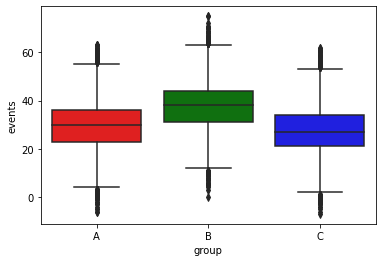

In [8]:
sns.boxplot(x = "group", y = "events", data = test_1, palette = ["r", "g", "b"])

In [7]:
pg.anova(data = test_1, dv = "events", between = "group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [14]:
#Check if the variances within groups are roughly the same (homogeneous) using Levene's test

In [11]:
A = test_1.query("group == 'A'").events
B = test_1.query("group == 'B'").events
C = test_1.query("group == 'C'").events

In [12]:
ss.levene(A, B, C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [13]:
pg.homoscedasticity(data = test_1, dv = "events", group = "group")

,W,pval,equal_var
levene,2.26226,0.104133,True


In [20]:
#Check distribution for normality

In [21]:
print(ss.normaltest(A))
print(ss.normaltest(B))
print(ss.normaltest(C))

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)
NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)
NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)


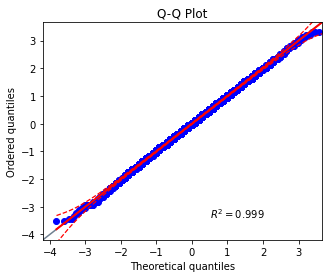

In [22]:
pg.qqplot(A)

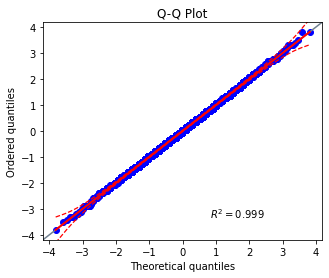

In [23]:
pg.qqplot(B)

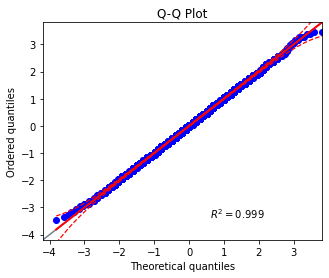

In [24]:
pg.qqplot(C)

In [25]:
#take a test

In [28]:
ss.f_oneway(A, B, C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [29]:
#take a test Tukey

In [33]:
pairwise_tukeyhsd(test_1.events, test_1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [36]:
test_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [35]:
#build distribution plots for the control and test groups

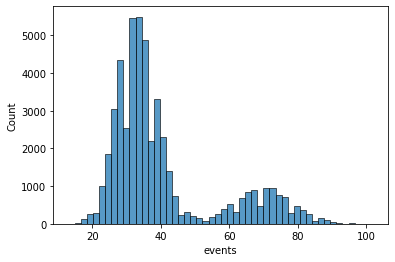

In [41]:
sns.histplot(data = test_2.query('group == "test"'), x = 'events', bins = 50)

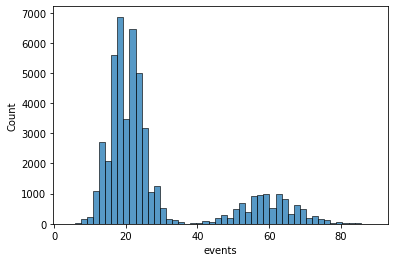

In [42]:
sns.histplot(data = test_2.query('group == "control"'), x = 'events', bins = 50)

In [43]:
#Calculate the mean and standard deviation of events by group and by user segment

In [57]:
test_2.query("group == 'test' and segment == 'high'").events.mean()

69.9385

In [64]:
test_2.query("group == 'test' and segment == 'high'").events.std()

8.403974085398099

In [58]:
test_2.query("group == 'test' and segment == 'low'").events.std()

5.720845313076766

In [65]:
test_2.query("group == 'test' and segment == 'low'").events.mean()

33.025925

In [59]:
test_2.query("group == 'control' and segment == 'high'").events.mean()

59.9708

In [63]:
test_2.query("group == 'control' and segment == 'high'").events.std()

7.805346866345555

In [62]:
test_2.query("group == 'control' and segment == 'low'").events.std()

4.473575565622373

In [66]:
test_2.query("group == 'control' and segment == 'low'").events.mean()

20.031575

In [68]:
#Test (via anova_lm or pg.anova) and then use Tukey's test to see which groups have statistically significant differences

In [71]:
test_2['combination'] = test_2['group'] + ' \ ' + test_2['segment']
test_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [72]:
model_main = smf.ols("events ~ segment + group + segment:group", data = test_2).fit()
anova_lm(model_main)

,df,sum_sq,mean_sq,F,PR(>F)
segment,1.0,2.362480e+07,2.362480e+07,689756.377484,0.000000e+00
group,1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
segment:group,1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [75]:
MultiComparison(test_2.events, test_2.combination).tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control \ high,control \ low,-39.9392,0.001,-40.1073,-39.7711,True
control \ high,test \ high,9.9677,0.001,9.7551,10.1803,True
control \ high,test \ low,-26.9449,0.001,-27.113,-26.7768,True
control \ low,test \ high,49.9069,0.001,49.7388,50.075,True
control \ low,test \ low,12.9944,0.001,12.888,13.1007,True
test \ high,test \ low,-36.9126,0.001,-37.0807,-36.7445,True


In [69]:
#Visualize test results

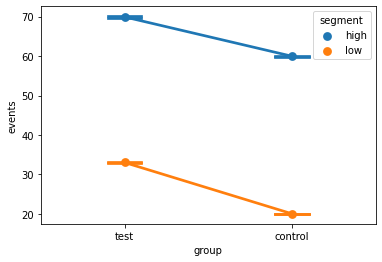

In [78]:
sns.pointplot(x = "group", y = "events", hue = "segment", data = test_2, capsize=0.2)